# Death Details

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../curated data/DD_2020-09-04.csv')
df.head()

,STUDYID,DOMAIN,USUBJID,DDSEQ,DDTEST,DDTESTCD,DDORRES,DDSTRESC,DDRESCAT,DDEVAL,DDDY,DDSTRTPT,DDSTTPT
0,EJPDEJ,DD,6359,1,Location of Death,LOCDTH,Deceased on admission,NaN,NaN,NaN,1.0,NaN,NaN
1,EOPNOJ,DD,364,1,Burial Organiser,BURLORG,CROIX ROUGE GUINEENNE,NaN,NaN,NaN,8.0,NaN,NaN
2,EOPNOJ,DD,8186,1,Burial Organiser,BURLORG,CROIX ROUGE GUINEENNE,NaN,NaN,NaN,7.0,NaN,NaN
3,EOPNOJ,DD,4164,1,Burial Organiser,BURLORG,CROIX ROUGE GUINEENNE,NaN,NaN,NaN,9.0,NaN,NaN
4,EOPNOJ,DD,4164,2,Death Notes,DTHNTE,Enterrement sécurisé,NaN,NaN,NaN,9.0,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STUDYID   1028 non-null   object 
 1   DOMAIN    1028 non-null   object 
 2   USUBJID   1028 non-null   int64  
 3   DDSEQ     1028 non-null   int64  
 4   DDTEST    1028 non-null   object 
 5   DDTESTCD  1028 non-null   object 
 6   DDORRES   1028 non-null   object 
 7   DDSTRESC  0 non-null      float64
 8   DDRESCAT  0 non-null      float64
 9   DDEVAL    0 non-null      float64
 10  DDDY      1027 non-null   float64
 11  DDSTRTPT  130 non-null    object 
 12  DDSTTPT   130 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 104.5+ KB


The features are :

**STUDYID** : Study identifier

**DOMAIN** : Domain abreviation DD: Death Details

**USUBJID** : Unique Subject Identifier for a study

**DDSEQ** : Observation Sequence Number for the same subject 

**DDTEST** : Test Short Name 
    
**DDTESTCD** : Test Name

**DDORRES** : Result or Finding (in Original Units)

**DDSTRESC** : Result or Finding (in Standard Units, Character Format) => No values

**DDRESCAT** : SubCategory for Observation  => No values

**DDEVAL** : Evaluator (role of the observer) => No values

**DDDY** : Study Day of Observation/Collection 

**DDDTC** : Date/Time of Observation/Collection => Not present in the dataset

**DDSTRTPT** : Start of Observation Relative to Reference Time Point

**DDSTTPT** : Start Reference Time Point

A very important feature **DDDTC** representing the Study Day of Observation/Collection is missing

Drop features that have no values

In [4]:
df.drop(columns=['DDSTRESC', 'DDRESCAT', 'DDEVAL'],inplace=True)

In [5]:
len(df[df.duplicated()])

0

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STUDYID   1028 non-null   object 
 1   DOMAIN    1028 non-null   object 
 2   USUBJID   1028 non-null   int64  
 3   DDSEQ     1028 non-null   int64  
 4   DDTEST    1028 non-null   object 
 5   DDTESTCD  1028 non-null   object 
 6   DDORRES   1028 non-null   object 
 7   DDDY      1027 non-null   float64
 8   DDSTRTPT  130 non-null    object 
 9   DDSTTPT   130 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 80.4+ KB


### Study identifier

We first look the number of records we have per study.

In [6]:
stdy_id_count = df['STUDYID'].value_counts()
stdy_id_count.sort_index(inplace = True)
stdy_id_count

EJPDEJ      1
EOPNOJ     15
EORKWS     26
EQJJGF     48
ERFCVU    808
ESYADD    130
Name: STUDYID, dtype: int64

In [7]:
stdy_id_count.nunique()

6

We then look at the number of people per study.

In [8]:
stdy_subid_count = df.groupby('STUDYID').USUBJID.nunique()
stdy_subid_count.sort_index(inplace = True)
stdy_subid_count

STUDYID
EJPDEJ      1
EOPNOJ     12
EORKWS     13
EQJJGF     48
ERFCVU    457
ESYADD    130
Name: USUBJID, dtype: int64

In [9]:
sum(stdy_subid_count)

661

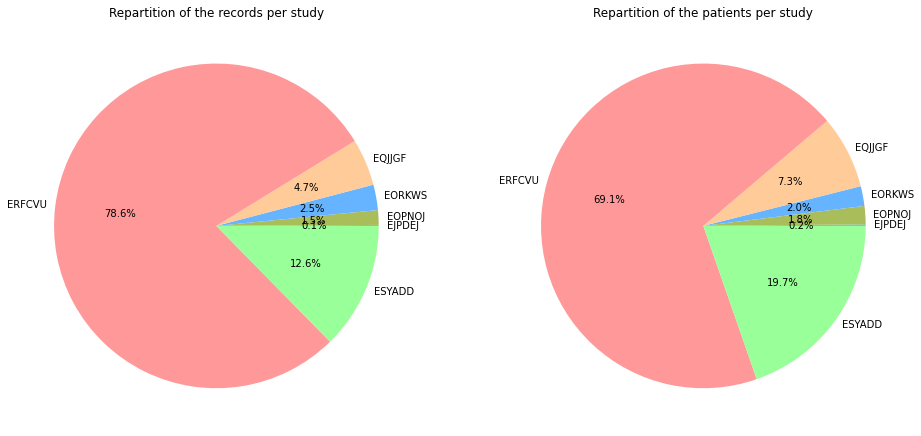

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))

colors = ["#6FBAaD",'#A9BD5A', '#66b3ff', '#ffcc99','#ff9999','#99ff99', "#ffb266"]

ax1.pie(stdy_id_count.values,labeldistance=1.05, colors=colors, labels=stdy_id_count.index, autopct='%1.1f%%',
          startangle=0)

ax1.set_title("Repartition of the records per study")


ax2.pie(stdy_subid_count.values, labeldistance=1.05, colors=colors, labels=stdy_subid_count.index, autopct='%1.1f%%',
          startangle=0)

ax2.set_title("Repartition of the patients per study")

plt.show()

###  Domain abreviation 

In [11]:
df['DOMAIN'].value_counts()

DD    1028
Name: DOMAIN, dtype: int64

### Unique Subject Identifier for a study

In [12]:
df['USUBJID'].value_counts()

728     4
8947    3
374     3
4638    3
5251    3
       ..
7298    1
7299    1
3209    1
3216    1
8192    1
Name: USUBJID, Length: 661, dtype: int64

In [13]:
max(df.groupby('USUBJID').STUDYID.nunique())

1

Even a cross different studies the identifier is unique.

The number of subjects is

In [14]:
df['USUBJID'].nunique()

661

### Observation Sequence Number for the same subject

In [15]:
df['DDSEQ'].value_counts()

1    661
2    272
3     94
4      1
Name: DDSEQ, dtype: int64

In [16]:
df[df['DDSEQ'] ==4]

,STUDYID,DOMAIN,USUBJID,DDSEQ,DDTEST,DDTESTCD,DDORRES,DDDY,DDSTRTPT,DDSTTPT
220,ERFCVU,DD,728,4,Primary Cause of Death,PRCDTH,EBOLA,1.0,NaN,NaN


In [17]:
df[df['USUBJID'] ==728]

,STUDYID,DOMAIN,USUBJID,DDSEQ,DDTEST,DDTESTCD,DDORRES,DDDY,DDSTRTPT,DDSTTPT
217,ERFCVU,DD,728,3,Date/Time of Transfer to Morgue,MORGDTC,2014-12-26,1.0,NaN,NaN
218,ERFCVU,DD,728,2,Date/Time of Burial,BURLDTC,2014-12-26,1.0,NaN,NaN
219,ERFCVU,DD,728,1,Death Notes,DTHNTE,DOA,1.0,NaN,NaN
220,ERFCVU,DD,728,4,Primary Cause of Death,PRCDTH,EBOLA,1.0,NaN,NaN


### Test Short Name

In [18]:
test_count = df['DDTEST'].value_counts()
test_count

Primary Cause of Death                588
Date/Time of Transfer to Morgue       244
Date/Time of Burial                    86
Death Notes                            79
Death within 48 hours of admission     13
Burial Organiser                       12
Location of Death                       6
Name: DDTEST, dtype: int64

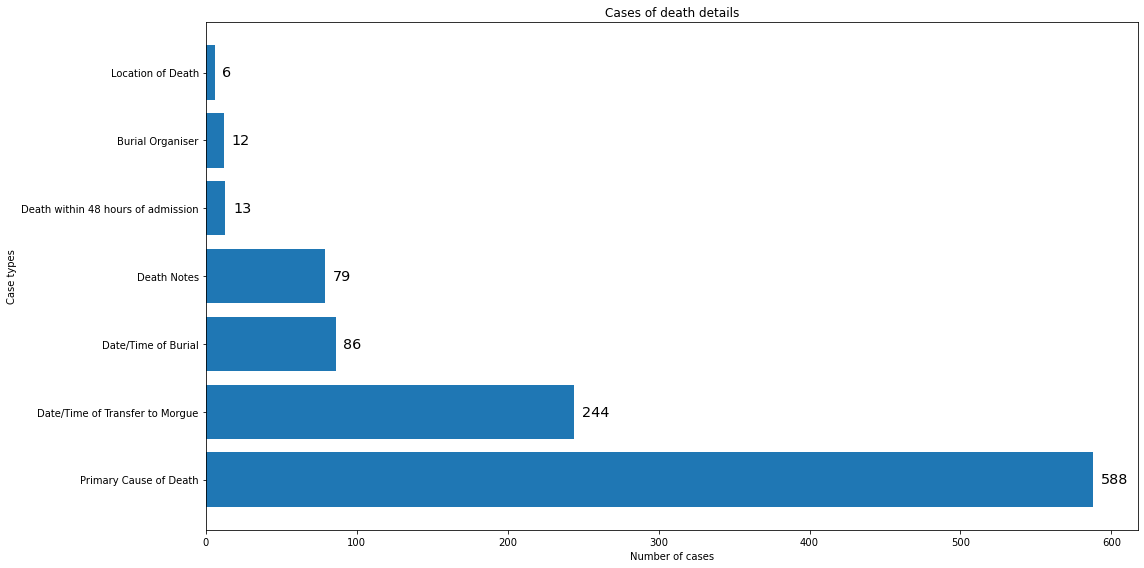

In [37]:
fig ,ax=plt.subplots(figsize=(16,8))

y = test_count.values
x = test_count.index
ax.barh(x, y, align='center')

ax.set_title("Cases of death details")
ax.set_xlabel("Number of cases")
ax.set_ylabel("Case types")

for i, v in enumerate(y):
    ax.text(v + 5, i , str(v),{'fontsize' : 'x-large','verticalalignment' : 'center'})

fig.tight_layout()
plt.savefig('death_details.png', dpi=300)

plt.show()

In [20]:
death_causes = df[df['DDTEST'] == "Primary Cause of Death"]
death_causes.head()

,STUDYID,DOMAIN,USUBJID,DDSEQ,DDTEST,DDTESTCD,DDORRES,DDDY,DDSTRTPT,DDSTTPT
17,EORKWS,DD,7570,2,Primary Cause of Death,PRCDTH,EVD,4.0,NaN,NaN
18,EORKWS,DD,2994,2,Primary Cause of Death,PRCDTH,EVD,4.0,NaN,NaN
20,EORKWS,DD,7735,2,Primary Cause of Death,PRCDTH,EVD,4.0,NaN,NaN
23,EORKWS,DD,4509,2,Primary Cause of Death,PRCDTH,EVD,5.0,NaN,NaN
24,EORKWS,DD,7247,2,Primary Cause of Death,PRCDTH,EVD,6.0,NaN,NaN


### Result or Finding

In [21]:
death_causes['DDORRES'].value_counts()

EBOLA                                   262
OTHER                                   175
DIED EBOLA POSITIVE                     111
PROBABLE EBOLA                           13
EVD                                      13
DIED EBOLA NEGATIVE                      12
EBOLA SURVIVOR DIED BEFORE DISCHARGE      1
DIED BEFORE TEST DONE                     1
Name: DDORRES, dtype: int64

C:\Users\Ridha\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


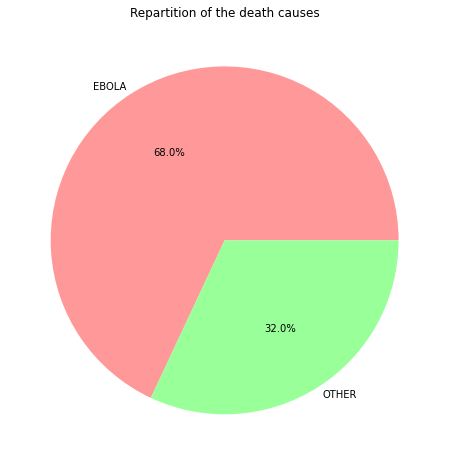

In [22]:
def parse_death_causes(cause):
    ebola = ['EBOLA', 'DIED EBOLA POSITIVE', 'PROBABLE EBOLA','EVD', 'EBOLA SURVIVOR DIED BEFORE DISCHARGE']
    if(cause in ebola):
        return "EBOLA"
    else:
        return "OTHER"

death_causes.loc[:,'DDORRES'] = death_causes['DDORRES'].apply(lambda x: parse_death_causes(x))
death_causes_count = death_causes['DDORRES'].value_counts()

fig, ax = plt.subplots(figsize=(8,8))

colors = ['#ff9999','#99ff99']

ax.pie(death_causes_count.values,labeldistance=1.05, colors=colors, labels=death_causes_count.index, autopct='%1.1f%%',
          startangle=0)

plt.title("Repartition of the death causes")
plt.show()

In [23]:
from dateutil.parser import parse

transfer_morgue = df[df['DDTEST'] == "Date/Time of Transfer to Morgue"]
transfer_morgue.loc[:,'DDORRES']= transfer_morgue['DDORRES'].apply(lambda d: parse(d))
transfer_morgue['DDORRES'].head()

217   2014-12-26
221   2014-12-25
225   2014-12-31
228   2014-12-21
229   2014-12-22
Name: DDORRES, dtype: datetime64[ns]

In [24]:
transfer_morgue.loc[:,'DDORRES_day'] = transfer_morgue['DDORRES'].dt.to_period('D')
transfer_morgue.loc[:,'DDORRES_month'] = transfer_morgue['DDORRES'].dt.to_period('M')
transfer_morgue.loc[:,'DDORRES_year'] = transfer_morgue['DDORRES'].dt.to_period('Y')

C:\Users\Ridha\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


In [25]:
transfer_morgue['STUDYID'].value_counts()

ERFCVU    244
Name: STUDYID, dtype: int64

All the data come from the same study

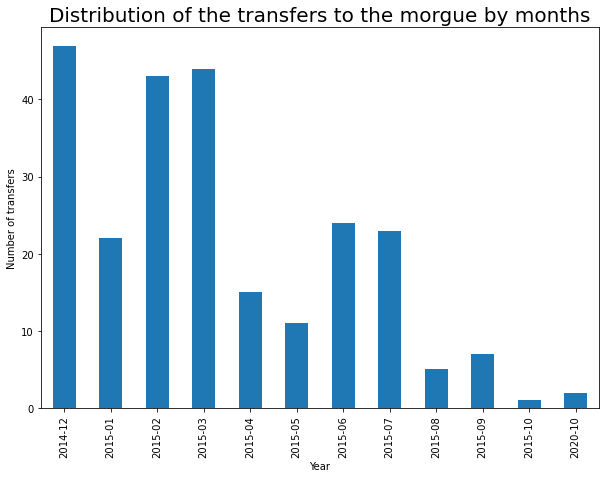

In [26]:
fig, ax = plt.subplots(figsize=(10,7))

transfer_morgue['DDORRES_month'].value_counts().sort_index().plot(kind ="bar")

ax.set_title("Distribution of the transfers to the morgue by months",size=20)
ax.set_xlabel('Year')
ax.set_ylabel('Number of transfers')
plt.show()

In [27]:
transfer_morgue['DDORRES_year'].value_counts()

2015    195
2014     47
2020      2
Freq: A-DEC, Name: DDORRES_year, dtype: int64

### Study Day of Observation/Collection

This variable describes the study day of the observation relative to the date in RFSTDTC.  This will be blank for records with no value in the --DTC variable.

In [28]:
df['DDDY'].value_counts()

 1.0     228
 2.0     177
 3.0     130
 5.0     115
 4.0     108
 6.0      69
 7.0      56
 8.0      40
 9.0      37
 10.0     17
 11.0      9
 13.0      6
 17.0      6
 16.0      5
 15.0      5
 12.0      5
 14.0      4
 20.0      2
 24.0      2
 64.0      2
 19.0      1
 58.0      1
-1.0       1
 18.0      1
Name: DDDY, dtype: int64

### Start of Observation Relative to Reference Time Point

In [29]:
df['DDSTRTPT'].value_counts()

DURING     124
BEFORE       5
UNKNOWN      1
Name: DDSTRTPT, dtype: int64

### Start Reference Time Point

In [30]:
df['DDSTTPT'].value_counts()

KERRY TOWN ETC (DISCHARGE FORM)    130
Name: DDSTTPT, dtype: int64